# Imports

In [8]:
import torch
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import h5py

# DataLoading

In [5]:

train_mat_file = 'train/digitStruct.mat'
def showimg(index):
    img = cv2.imread('train/%d.png'%(index+1))
    plt.imshow(img[:,:,::-1])

def load_img(fn):
    img = cv2.imread(fn)
    img = cv2.resize(img,(64,32))
#     return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)).reshape((32,64,1))
    
    
# Functions to convert mat files to csv for easy preprocessing
def get_box_data(data, index):
    meta_data = dict()
    meta_data['height'] = []
    meta_data['label'] = []
    meta_data['left'] = []
    meta_data['top'] = []
    meta_data['width'] = []

    def print_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(obj[0][0])
        else:
            for k in range(obj.shape[0]):
                vals.append(int(data[obj[k][0]][0][0]))
        meta_data[name] = vals

    box = data['/digitStruct/bbox'][index]
    data[box[0]].visititems(print_attrs)
    return meta_data

def create_dateset(dataset):
    data = h5py.File('%s/digitStruct.mat'%dataset, 'r')
    df = []
    for i in tqdm(range(len(data['/digitStruct/name']))):
        meta_data = get_box_data(data, i)
        num_length = len(meta_data['label'])
        if num_length < 6:
            dd = {'filename': '%s/%d.png'%(dataset, i+1), 'len': num_length}
            for i in range(5):
                dd['num%d'%(i+1)] = -1
                dd['bbox%d'%(i+1)] = (0, 0, 0, 0)
            for i in range(num_length):
                dd['num%d'%(i+1)] = int(meta_data['label'][i])
                dd['bbox%d'%(i+1)] = (meta_data['left'][i], meta_data['top'][i], meta_data['width'][i], meta_data['height'][i])
        df.append(dd)
    df = pd.DataFrame(df)
    for i in range(1, 6):
#         df.set_value(df[df['num%d'%i] == 10].index, 'num%d'%i, 0)
        df.at[df[df['num%d'%i] == 10].index,'num%d'%i]=0
    for i in range(1, 6):
#         df.set_value(df['num%d'%i].isnull(), 'num%d'%i, 10)
        df.at[df['num%d'%i].isnull(),'num%d'%i]=10
    for i in range(1, 6):
        for j in df['bbox%d'%i][df['bbox%d'%i].isnull()].index:
#             df.set_value(j, 'bbox%d'%(i+1), (0,0,0,0))
            df.at[j,'bbox%d'%(i+1)]=(0,0,0,0)
    
    df = df.dropna()
    df = df.reset_index(drop=True)
    
    df.to_csv('%s.csv'%dataset)

{'height': [219, 219], 'label': [1, 9], 'left': [246, 323], 'top': [77, 81], 'width': [81, 96]}


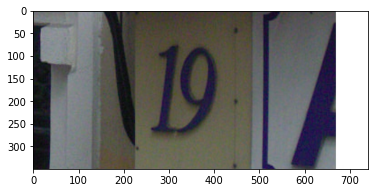

In [10]:
train_mat_file = "train/digitStruct.mat"
d = h5py.File(train_mat_file, 'r')
a = 0
showimg(a)
print(get_box_data(d, a))

In [40]:
create_dateset('train')

100%|██████████| 33402/33402 [06:13<00:00, 89.53it/s] 


In [ ]:
create_dateset('test')

 24%|██▍       | 3194/13068 [00:29<01:24, 116.72it/s]

In [77]:
df=pd.read_csv("test.csv")

In [12]:
df.head()

,Unnamed: 0,filename,len,num1,bbox1,num2,bbox2,num3,bbox3,num4,bbox4,num5,bbox5
0,0,train/1.png,2,1,"(246, 77, 81, 219)",9,"(323, 81, 96, 219)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)"
1,1,train/2.png,2,2,"(77, 29, 23, 32)",3,"(98, 25, 26, 32)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)"
2,2,train/3.png,2,2,"(17, 5, 8, 15)",5,"(25, 5, 9, 15)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)"
3,3,train/4.png,2,9,"(57, 13, 15, 34)",3,"(72, 13, 13, 34)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)"
4,4,train/5.png,2,3,"(52, 7, 21, 46)",1,"(74, 10, 15, 46)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)",-1,"(0, 0, 0, 0)"
